In [1]:
import pandas as pd
import numpy as np
import datetime
from scipy import stats
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('RawData4AllWeatherAnalysis/dataset_adj_yields.csv', index_col = 'Date', parse_dates = True)
data

,SPX,Gold,DBC_syn,DGS10,DGS20,DGS30,UST10,UST20,UST30
Date,,,,,,,,,
1970-01-30,85.02,34.94,95.08,7.75,6.96,NaN,112.29,104.81,NaN
1970-02-27,89.50,34.99,95.21,6.90,6.55,NaN,120.06,110.31,NaN
1970-03-31,89.63,35.09,95.40,7.08,6.68,NaN,119.21,109.34,NaN
1970-04-30,81.52,35.62,95.51,7.82,7.07,NaN,114.05,105.54,NaN
1970-05-29,76.55,35.95,95.44,7.95,7.46,NaN,113.77,102.02,NaN
...,...,...,...,...,...,...,...,...,...
2021-02-26,3811.15,1808.17,6009.21,1.44,2.08,2.17,2154.29,3455.61,4428.74
2021-03-31,3972.89,1718.23,6167.13,1.74,2.31,2.41,2098.67,3337.55,4222.91
2021-04-30,4181.17,1760.04,6286.93,1.65,2.19,2.30,2119.11,3409.22,4334.15


In [3]:
data.drop(['DGS10',"DGS20",'DGS30'], axis = 1, inplace = True)

In [4]:
data

,SPX,Gold,DBC_syn,UST10,UST20,UST30
Date,,,,,,
1970-01-30,85.02,34.94,95.08,112.29,104.81,NaN
1970-02-27,89.50,34.99,95.21,120.06,110.31,NaN
1970-03-31,89.63,35.09,95.40,119.21,109.34,NaN
1970-04-30,81.52,35.62,95.51,114.05,105.54,NaN
1970-05-29,76.55,35.95,95.44,113.77,102.02,NaN
...,...,...,...,...,...,...
2021-02-26,3811.15,1808.17,6009.21,2154.29,3455.61,4428.74
2021-03-31,3972.89,1718.23,6167.13,2098.67,3337.55,4222.91
2021-04-30,4181.17,1760.04,6286.93,2119.11,3409.22,4334.15


In [5]:
# Let's create required columns for calculating allocations- number of shares to buy and returns - monthly and cumulative
data['SPX_shares'] = 0.0
data['GLD_shares'] = 0.0
data['DBC_shares'] = 0.0
data['IEF_shares'] = 0.0
data['TLT_shares'] = 0.0
data['Abs_ch'] = 0.0 
data['Equity']= 0.0
data

,SPX,Gold,DBC_syn,UST10,UST20,UST30,SPX_shares,GLD_shares,DBC_shares,IEF_shares,TLT_shares,Abs_ch,Equity
Date,,,,,,,,,,,,,
1970-01-30,85.02,34.94,95.08,112.29,104.81,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-02-27,89.50,34.99,95.21,120.06,110.31,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-03-31,89.63,35.09,95.40,119.21,109.34,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-04-30,81.52,35.62,95.51,114.05,105.54,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-05-29,76.55,35.95,95.44,113.77,102.02,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26,3811.15,1808.17,6009.21,2154.29,3455.61,4428.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-31,3972.89,1718.23,6167.13,2098.67,3337.55,4222.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-30,4181.17,1760.04,6286.93,2119.11,3409.22,4334.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#Add columns to calculate the drawdown
data['Max'] = 0.0 #current maximum 
data['Drawdown'] = 0.0 #cumulative absolute difference between current month equity and maximum - absolute drawdown  
data['Drawdown%'] = 0.0 # % drawdown
data

,SPX,Gold,DBC_syn,UST10,UST20,UST30,SPX_shares,GLD_shares,DBC_shares,IEF_shares,TLT_shares,Abs_ch,Equity,Max,Drawdown,Drawdown%
Date,,,,,,,,,,,,,,,,
1970-01-30,85.02,34.94,95.08,112.29,104.81,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-02-27,89.50,34.99,95.21,120.06,110.31,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-03-31,89.63,35.09,95.40,119.21,109.34,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-04-30,81.52,35.62,95.51,114.05,105.54,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1970-05-29,76.55,35.95,95.44,113.77,102.02,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26,3811.15,1808.17,6009.21,2154.29,3455.61,4428.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-03-31,3972.89,1718.23,6167.13,2098.67,3337.55,4222.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-30,4181.17,1760.04,6286.93,2119.11,3409.22,4334.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.info() #check 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 618 entries, 1970-01-30 to 2021-06-30
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SPX         618 non-null    float64
 1   Gold        618 non-null    float64
 2   DBC_syn     618 non-null    float64
 3   UST10       618 non-null    float64
 4   UST20       618 non-null    float64
 5   UST30       533 non-null    float64
 6   SPX_shares  618 non-null    float64
 7   GLD_shares  618 non-null    float64
 8   DBC_shares  618 non-null    float64
 9   IEF_shares  618 non-null    float64
 10  TLT_shares  618 non-null    float64
 11  Abs_ch      618 non-null    float64
 12  Equity      618 non-null    float64
 13  Max         618 non-null    float64
 14  Drawdown    618 non-null    float64
 15  Drawdown%   618 non-null    float64
dtypes: float64(16)
memory usage: 82.1 KB


In [104]:
timer = 12 #rebalance every 1,3,6,9,12 months
initial_cash = 100.00 #initialize current balance
allocations = {'SPX':0.32,'GLD':0.2,'DBC':0.15,'IEF':0.1,'TLT':0.23} #change allocations in a portfolio

for i in range(0,len(data)):
    if i == 0: # initialize the starting capital and allocations
        data.iat[i,11] = 0.0
        data.iat[i,12] = initial_cash
        data.iat[i,6] = (data.iat[i,12]*allocations['SPX'])/data.iat[i,0]
        data.iat[i,7] = data.iat[i,12]*allocations['GLD']/data.iat[i,1]
        data.iat[i,8] = data.iat[i,12]*allocations['DBC']/data.iat[i,2]
        data.iat[i,9] = data.iat[i,12]*allocations['IEF']/data.iat[i,3]
        
        if pd.isna(data.iat[i,5]) == True: # if UST30 == nan then allocate to UST20
            data.iat[i,10] = data.iat[i,12]*allocations['TLT']/data.iat[i,4]
        else: 
            data.iat[i,10] = data.iat[i,12]*allocations['TLT']/data.iat[i,5]
        data.iat[i,13] = initial_cash #initialize current max value 
        
    if i >= 1:         
        if i%timer == 0: # time to rebalance? then allocate the equity to shares
            data.iat[i,6] = (data.iat[i-1,12]*allocations['SPX'])/data.iat[i-1,0]
            data.iat[i,7] = data.iat[i-1,12]*allocations['GLD']/data.iat[i-1,1]
            data.iat[i,8] = data.iat[i-1,12]*allocations['DBC']/data.iat[i-1,2]
            data.iat[i,9] = data.iat[i-1,12]*allocations['IEF']/data.iat[i-1,3]

            if pd.isna(data.iat[i,5]-data.iat[i-1,5]) == True: # if UST30 == nan then allocate to UST20
                data.iat[i,10] = data.iat[i-1,12]*allocations['TLT']/data.iat[i-1,4]
            else: 
                data.iat[i,10] = data.iat[i-1,12]*allocations['TLT']/data.iat[i-1,5]

        else:
            data.iat[i,6] = data.iat[i-1,6] #we assign the previous cell value to the number of shares if not time to rebalance 
            data.iat[i,7] = data.iat[i-1,7]
            data.iat[i,8] = data.iat[i-1,8]
            data.iat[i,9] = data.iat[i-1,9]
            data.iat[i,10] = data.iat[i-1,10]
    
    
        if pd.isna(data.iat[i,5]-data.iat[i-1,5]) == True: # if UST30 change == nan then use UST20 to calculate absolute return
            data.iat[i,11] = (data.iat[i,0]-data.iat[i-1,0])*data.iat[i,6]+(data.iat[i,1]-data.iat[i-1,1])*data.iat[i,7]+(data.iat[i,2]-data.iat[i-1,2])*data.iat[i,8]+(data.iat[i,3]-data.iat[i-1,3])*data.iat[i,9]+(data.iat[i,4]-data.iat[i-1,4])*data.iat[i,10]
        else:
            data.iat[i,11] = (data.iat[i,0]-data.iat[i-1,0])*data.iat[i,6]+(data.iat[i,1]-data.iat[i-1,1])*data.iat[i,7]+(data.iat[i,2]-data.iat[i-1,2])*data.iat[i,8]+(data.iat[i,3]-data.iat[i-1,3])*data.iat[i,9]+(data.iat[i,5]-data.iat[i-1,5])*data.iat[i,10]
        #calculate equity
        data.iat[i,12] = data.iat[i,11] +data.iat[i-1,12]
        
        #calculate drawdown
        data.iat[i,13] = np.maximum(data.iat[i,12],data.iat[i-1,13])
        data.iat[i,14] = data.iat[i,12] - data.iat[i,13]
        data.iat[i,15] = (data.iat[i,14]/data.iat[i,13])*100

In [105]:
data

,SPX,Gold,DBC_syn,UST10,UST20,UST30,SPX_shares,GLD_shares,DBC_shares,IEF_shares,TLT_shares,Abs_ch,Equity,Max,Drawdown,Drawdown%
Date,,,,,,,,,,,,,,,,
1970-01-30,85.02,34.94,95.08,112.29,104.81,NaN,0.376382,0.572410,0.157762,0.089055,0.219445,0.000000,100.000000,100.000000,0.000000,0.000000
1970-02-27,89.50,34.99,95.21,120.06,110.31,NaN,0.376382,0.572410,0.157762,0.089055,0.219445,3.634225,103.634225,103.634225,0.000000,0.000000
1970-03-31,89.63,35.09,95.40,119.21,109.34,NaN,0.376382,0.572410,0.157762,0.089055,0.219445,-0.152413,103.481812,103.634225,-0.152413,-0.147068
1970-04-30,81.52,35.62,95.51,114.05,105.54,NaN,0.376382,0.572410,0.157762,0.089055,0.219445,-4.025142,99.456671,103.634225,-4.177554,-4.031057
1970-05-29,76.55,35.95,95.44,113.77,102.02,NaN,0.376382,0.572410,0.157762,0.089055,0.219445,-2.490148,96.966523,103.634225,-6.667702,-6.433880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-26,3811.15,1808.17,6009.21,2154.29,3455.61,4428.74,0.792569,1.001168,0.264865,0.412493,0.433477,-31.683316,9230.896640,9302.951585,-72.054945,-0.774539
2021-03-31,3972.89,1718.23,6167.13,2098.67,3337.55,4222.91,0.792569,1.001168,0.264865,0.412493,0.433477,-32.192980,9198.703660,9302.951585,-104.247925,-1.120590
2021-04-30,4181.17,1760.04,6286.93,2119.11,3409.22,4334.15,0.792569,1.001168,0.264865,0.412493,0.433477,295.317265,9494.020926,9494.020926,0.000000,0.000000


In [106]:
# when maximum drawdown happened
data.loc[data['Drawdown%']==data['Drawdown%'].min()]

,SPX,Gold,DBC_syn,UST10,UST20,UST30,SPX_shares,GLD_shares,DBC_shares,IEF_shares,TLT_shares,Abs_ch,Equity,Max,Drawdown,Drawdown%
Date,,,,,,,,,,,,,,,,
1982-06-30,109.61,314.98,1376.42,109.46,91.46,70.48,0.946304,0.176744,0.036527,0.325933,1.175312,-11.6594,328.18382,433.713934,-105.530114,-24.331732


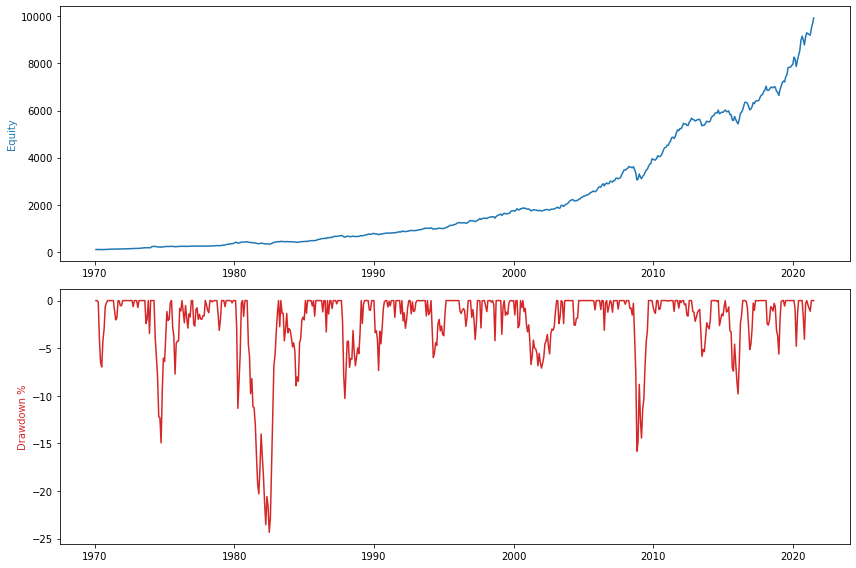

In [107]:
equity = data['Equity']
loss = data['Drawdown%']

plt.rcParams["figure.figsize"] = (12, 8)
fig,(ax1,ax2) = plt.subplots(2,1)
color = 'tab:blue'
ax1.set_ylabel('Equity', color= color)
ax1.plot(equity, color= color)


color = 'tab:red'
ax2.set_ylabel('Drawdown %', color= color)
ax2.plot(loss, color = color)
fig.tight_layout()
plt.show()

In [108]:
Monthly_returns = data['Abs_ch']/data['Equity'].shift(1)
Monthly_returns

Date
1970-01-30         NaN
1970-02-27    0.036342
1970-03-31   -0.001471
1970-04-30   -0.038897
1970-05-29   -0.025038
                ...   
2021-02-26   -0.003421
2021-03-31   -0.003488
2021-04-30    0.032104
2021-05-31    0.020888
2021-06-30    0.024590
Length: 618, dtype: float64

In [109]:
cagr = (np.round((data.iloc[-1,12]/data.iloc[0,12])**(1/51.5) - 1, decimals = 3))*100
cagr

9.3

In [110]:
SD = np.round(np.std(Monthly_returns*100)*np.sqrt(12), decimals = 2) # annual stadard deviation
SD

8.25

In [111]:
Sharpe = np.round((cagr-1.6)/SD, decimals = 2) #Sharpe ratio at current risk free yield UST10
Sharpe

0.93